# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение общей информации. 

Импортируем библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Построим гистограммы распределения данных.

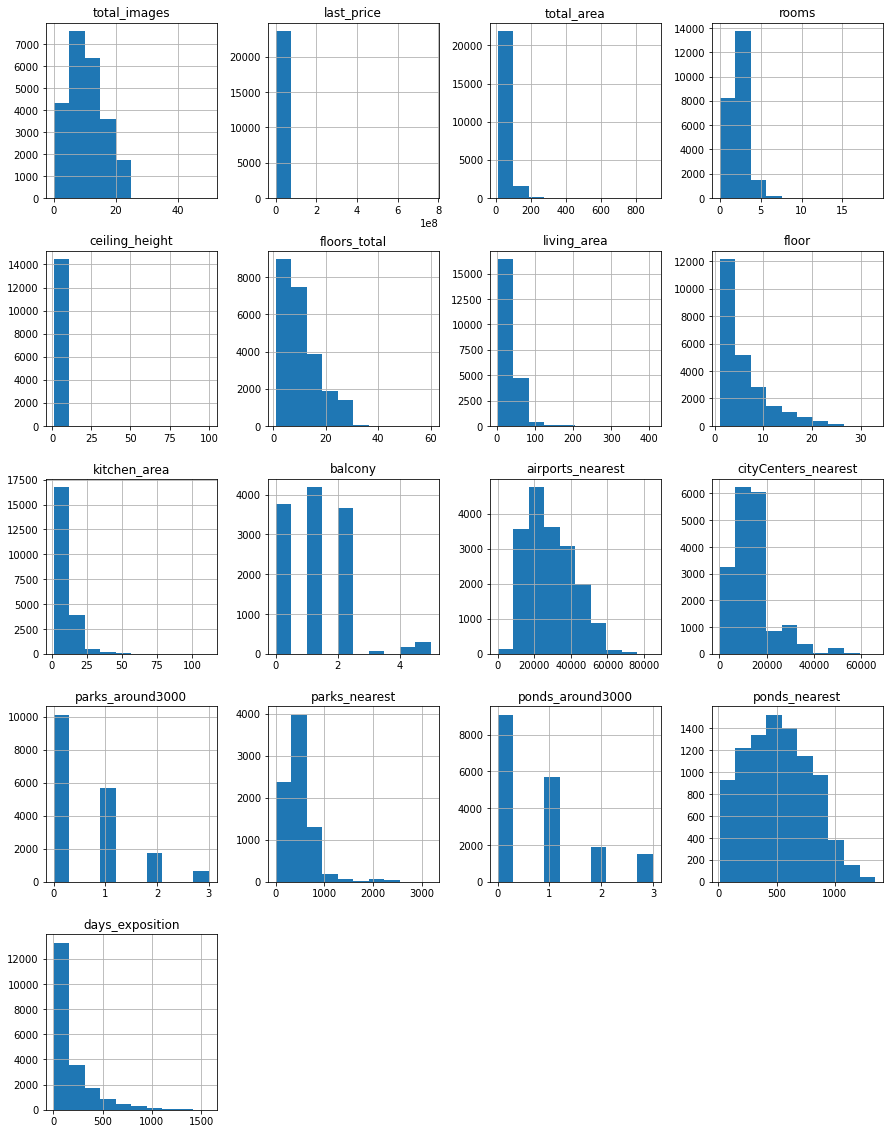

In [3]:
data.hist(figsize=(15, 20))
plt.show()

На гистограммах показано распределение параметров датафрейма. Практически на всех гистограммах можно увидеть распределение Пуассона - чем больше значение конкретного параметра, тем меньше он встречается в наших данных.

Посмотрим основную информацию о данных.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Из информации о данных можно заметить следующее:**
1. `first_day_exposition` имеет тип object, а не datetime
2. `ceiling_height` имеет пропущенные значения
3. `floors_total` имеет пропущенные значения + лучше привести к целочисленному типу, т.к. количество этажей - целое значение
4. `is_apartment` имеет пропущенные значения должен + нужно привести к типу bool
5. `living_area` имеет пропущенные значения
6. `kitchen_area` имеет пропущенные значения
7. `balcony` имеет пропущенные значения + нужно привести к типу int
8. `locality_name` имеет пропущенные значения
9. `airports_nearest` имеет пропущенные значения
10. `cityCenters_nearest` имеет пропущенные значения
11. `parks_around3000` имеет пропущенные значения + нужно привести к типу int
12. `parks_nearest` имеет пропущенные значения
13. `ponds_around3000` имеет пропущенные значения + нужно привести к типу int
14. `ponds_nearest` имеет пропущенные значения
15. `days_exposition` имеет пропущенные значения + нужно привести к типу int
16. `last_price` нужно привести к типу int

### Предобработка данных

#### Обработка пропущенных значений и изменение типов данных

Выведем общее колличество пропущенных значений для каждого столбца.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверим ceiling_height.

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:ylabel='Frequency'>

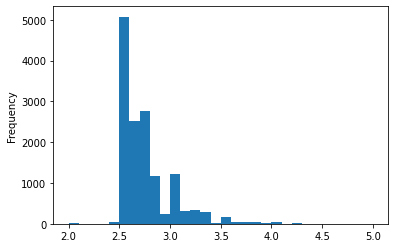

In [6]:
print(data['ceiling_height'].value_counts())
print(data['ceiling_height'].describe())
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))

Видно что есть необоснованно большие значения,однако медиана от среднего отличается не сильно из-за этих выбросов во всей выборке, поэтому пропущенные значения заменим на значение медианы

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

1. Так как апартаменты - это помещения, которые по условиям близки к жилой недвижимости, но проживать в них нельзя будем учитывать, что вероятно определенно большая часть квартир является жилой недвижимостью, поэтому заменим все пропущенные значения на False и изменим тип данных на bool.
2. Вероятное появление пустых значений балконов связано с тем, что при их отсутсвии в квартире при заполнении люди просто пропускали эти данные (а не заполняли нулевыми значениями, как другие пользователи) заменим пропуски в balcony на 0 и изменим тип данных на int.
3. Возникновение пропусков в days_exposition не ясно, поэтому для дальнейших исследований заменить пропущенные значения на медианные (так как медиана менее подвержена случайным выбросам данных) заменим пропуски в days_exposition на на медианные значения.
4. Переведем first_day_exposition в формат даты без времени, потому что время не указано.
5. Изменим цену на  int.

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
data['balcony'] = data['balcony'].fillna(0).astype('int')
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].describe()[5]
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['last_price'] = data['last_price'].astype('int')

print(data.info())
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

Все еще остаются переменные с пропущенным значениями, однако в их случае нельзя точно сказать, что конкретно вляет на появление пропусков, и сказать, что эти параметры могут как-то зависить от других (в таком случае можно было бы заменить пропуски на какое-либо усредненное значение) тоже нельзя, поэтому эти парамеры оставим как есть

#### Удаление дубликатов

Выведем список уникальных значений названий.

In [9]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Посчитаем колличество уникальных значений.

In [10]:
len(data['locality_name'].unique())

365

Поменяем "посёлки" на "поселки".

In [11]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок', regex=False)
data['locality_name'] = data['locality_name'].str.replace('городской ', '', regex=False)
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '', regex=False)
print(len(data['locality_name'].unique()))
data['locality_name'].unique()

323


array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

#### Аномальные значения

Исследуем высоту потолков.

In [12]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

<AxesSubplot:>

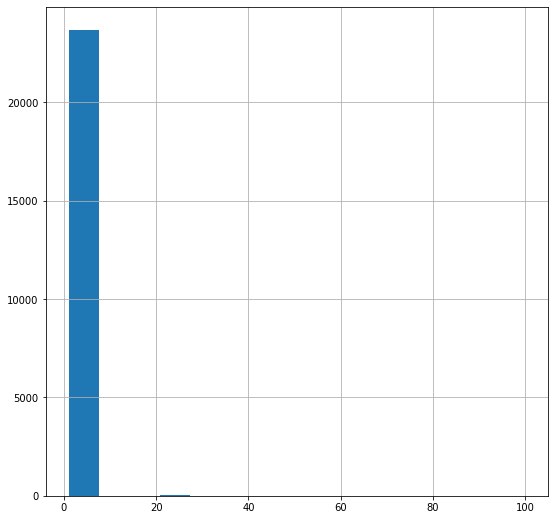

In [13]:
data['ceiling_height'].hist(bins=15, figsize=(9, 9))

Видно, что встречаются аномально высокие значения, и из гистограммы можно понять, что аномально высокими можно считать значения выше 5 метров. Вероятно такие значения появились из-за неправильного переноса запятых в таблицу. 

[ 0.52  0.53  0.55  0.56  0.58  0.6   0.8   0.83  1.    1.03  1.2   1.4
  1.75  2.    2.2   2.25  2.26  2.3   2.34  2.4   2.45  2.46  2.47  2.48
  2.49  2.5   2.51  2.52  2.53  2.54  2.55  2.56  2.57  2.58  2.59  2.6
  2.61  2.62  2.63  2.64  2.65  2.66  2.67  2.68  2.69  2.7   2.71  2.72
  2.73  2.74  2.75  2.76  2.77  2.78  2.79  2.8   2.81  2.82  2.83  2.84
  2.85  2.86  2.87  2.88  2.89  2.9   2.91  2.92  2.93  2.94  2.95  2.96
  2.97  2.98  2.99  3.    3.01  3.02  3.03  3.04  3.05  3.06  3.07  3.08
  3.09  3.1   3.11  3.12  3.13  3.14  3.15  3.16  3.17  3.18  3.2   3.21
  3.22  3.23  3.24  3.25  3.26  3.27  3.28  3.29  3.3   3.31  3.32  3.33
  3.34  3.35  3.36  3.37  3.38  3.39  3.4   3.42  3.43  3.44  3.45  3.46
  3.47  3.48  3.49  3.5   3.51  3.52  3.53  3.54  3.55  3.56  3.57  3.58
  3.59  3.6   3.62  3.63  3.65  3.66  3.67  3.68  3.69  3.7   3.75  3.76
  3.78  3.8   3.82  3.83  3.84  3.85  3.86  3.87  3.88  3.9   3.93  3.95
  3.98  4.    4.06  4.1   4.14  4.15  4.19  4.2   4.2

<AxesSubplot:>

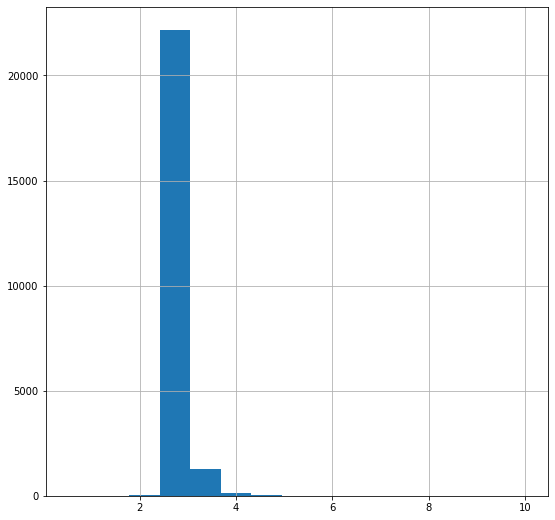

In [14]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>5 else x)
print(data['ceiling_height'].sort_values().unique())
data['ceiling_height'].hist(bins=15, figsize=(9, 9))

Также аномально высокие значение встречаются в столбцах last_price, total_area, rooms, kitchen_area, living_area. Но сказать, что это ошибки нельзя, так как это могут быть действительно большие по площади квартиры.

<AxesSubplot:ylabel='Frequency'>

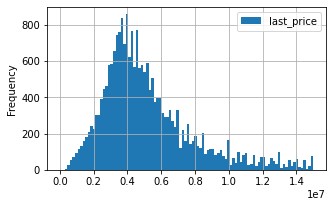

In [15]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))

Разброс данных довольно большой, поэтому удалять какие-либо значения нельзя

<AxesSubplot:ylabel='Frequency'>

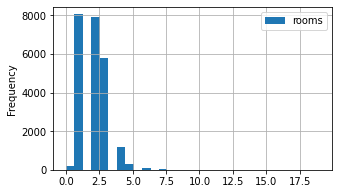

In [16]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

Данных выше 8 практически нет, поэтому удалим их.

<AxesSubplot:ylabel='Frequency'>

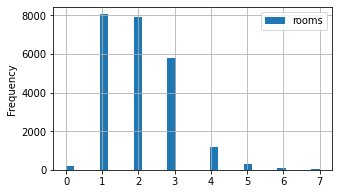

In [17]:
data = data[data['rooms'] < 8]
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))

<AxesSubplot:ylabel='Frequency'>

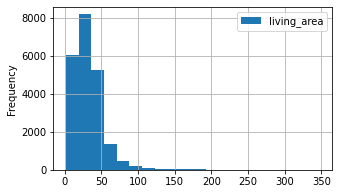

In [18]:
data.plot(y = 'living_area', kind = 'hist', bins = 20, grid=True, figsize = (5,3))

Данных выше 175 практически нет, поэтому удалим их.

<AxesSubplot:ylabel='Frequency'>

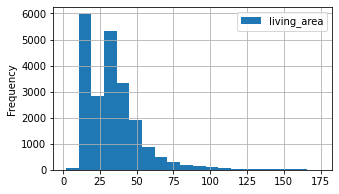

In [19]:
data = data[data['living_area'] < 175]
data.plot(y = 'living_area', kind = 'hist', bins = 20, grid=True, figsize = (5,3))

<AxesSubplot:ylabel='Frequency'>

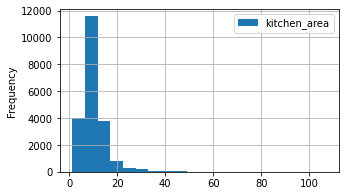

In [20]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 20, grid=True, figsize = (5,3))

Данных выше 50 практически нет, поэтому удалим их.

<AxesSubplot:ylabel='Frequency'>

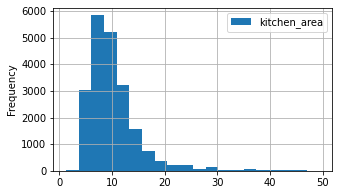

In [21]:
data = data[data['kitchen_area'] < 50]
data.plot(y = 'kitchen_area', kind = 'hist', bins = 20, grid=True, figsize = (5,3))

### Подсчет и добавление в таблицу новых столбцов

**Нужно построить новые столбцы:**
1. Цена одного квадратного метра
2. День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
3. Месяц публикации объявления
4. Год публикации объявления
5. Тип этажа квартиры (значения — «первый», «последний», «другой»)
6. Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [60]:
# цена квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area']

# день недели публикации
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# месяц публикации
data['month_exposition'] = data['first_day_exposition'].dt.month

# год публикации
data['year_exposition'] = data['first_day_exposition'].dt.year

# расстаяние в километрах
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest'] = data['cityCenters_nearest'].round(0)

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_cat
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,95.0,120370.370370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой
11,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,0.0,NaN,0.0,NaN,7.0,75000.000000,0,8,2018,другой


In [61]:
# функция категоризации этажа
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_cat'] = data.apply(floor_category, axis = 1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_cat
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,95.0,120370.370370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой
11,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,0.0,NaN,0.0,NaN,7.0,75000.000000,0,8,2018,другой


**Вывод этапа**
Итак, в предобработке данных были:
- Исследованы пропущенные значения, в столбцах ceiling_height (обработаны с помощью медианы), is_apartment (пропуски заменены на False), balcony (пропуски заменены на нулевые значения), days_exposition (обработаны с помощью медианы) пропуски были исправлены и заполнены для дальнейшей корректной работы с данными. 
- Обработаны неявные дубликаты в названиях населенных пунктов, а также очищены редко встречающиеся большие значения в параметрах. 
- Были обработа явно анамальные значения в стобце ceiling_height (возможно ошибка при переносе данных в датафрейм). 
- Также для дальнейшей работы с данными добавлены столбцы price_per_meter(цена за кв.м.), weekday_exposition (дня недели), month_exposition(месяца) и year_exposition(года) подачи объявления. Расстояния от центра Санкт-Петербурга переведены в километрыю

### Исследовательский анализ данных

#### Изучение параметров объектов

Изучим общую площадь.

count    20865.000000
mean        59.347900
std         29.026494
min         14.000000
25%         40.400000
50%         52.000000
75%         69.500000
max        413.500000
Name: total_area, dtype: float64

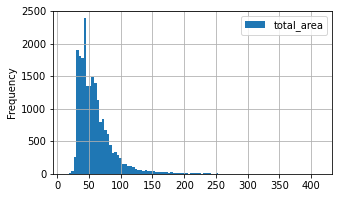

In [24]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
data['total_area'].describe()

В среднем у квартир, выставленных на продажу, площать составляет 52 кв.м.

Основной диапазон в нашей выборке колеблется от 40 до 69 м2

Изучим жилую площадь.

count    20865.000000
mean        33.950936
std         18.836090
min          2.000000
25%         18.800000
50%         30.000000
75%         42.300000
max        174.300000
Name: living_area, dtype: float64

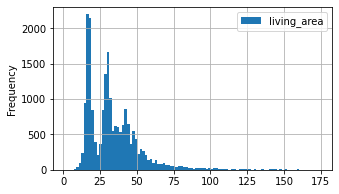

In [25]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
data['living_area'].describe()

В целом можно сказать, что жилая площадь в целом колеблется от 15 кв.м. до 50 кв.м.
Имеются пиковые значения около 18, 30 и 42 кв.м.

Изучим площадь кухни.

count    20865.000000
mean        10.334495
std          5.037147
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         49.400000
Name: kitchen_area, dtype: float64

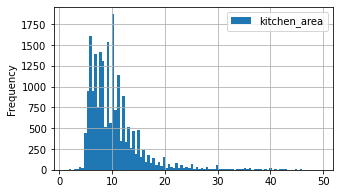

In [26]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3))
data['kitchen_area'].describe()

Самое распросраненная площадь кухни от 5 до 12 кв.м.

Изучим цену.

count    2.086500e+04
mean     6.194028e+06
std      7.000313e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.690000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

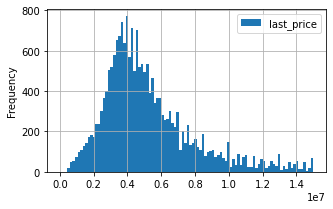

In [27]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
data['last_price'].describe()

Цены на недвижимость имеют среднее значение в 6,2 млн руб., медиана 4,6 млн руб. Цена имеет аспределение Гаусса.
Большинство квартир находятся в категории от 3,5 до 6,7 млн руб.

Изучим число комнат.

count    20865.000000
mean         2.074527
std          1.001463
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

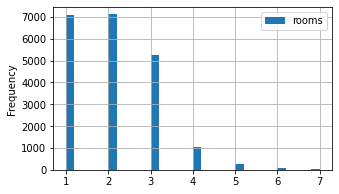

In [28]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()

Количество комнат колеблется от 1 до 7 (квартиры с большим колличеством комнат встречаются крайне редке, поэтому были исключены). Больше всего квартир с 1-3 комнатами.

Изучим высоту потолков.

count    20865.000000
mean         2.693646
std          0.223221
min          0.520000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

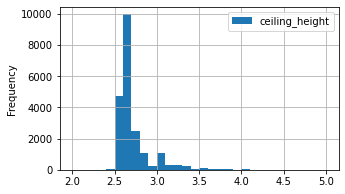

In [29]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

Высота потолков в среднем составляет 2,69 м, медиана 2,65 м. В основном высота потолков составляет 2,6-2,7 м.

Изучим этаж квартиры.

count    20865.000000
mean         5.853199
std          4.830968
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

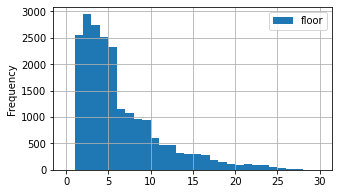

In [30]:
data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range=(0, 30))
data['floor'].describe()

Большая часть квартир находится в зоне до 10 этажа. Самое большое колличесво квартир находится на 2 этаже. Можно заметить, что пиковыми по значениям являются квартиры с 1 по 5 этаж, хотя в целом основной диапозон соствялет со 2 по 8 этаж.

Изучим тип этажа квартиры.

count      20865
unique         3
top       другой
freq       15351
Name: floor_cat, dtype: object

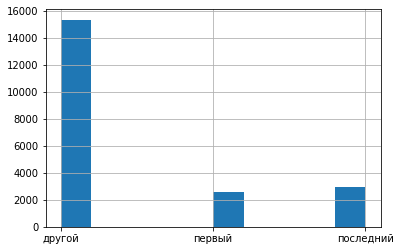

In [31]:
data['floor_cat'].hist()
data['floor_cat'].describe()

Первые и последние этажи составляют меньшую долю от всех квартир

Изучим  общее количество этажей в доме.

count    20826.000000
mean        10.579804
std          6.525730
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

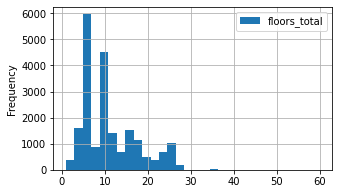

In [32]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['floors_total'].describe()

Можно заметить, что самыми распространнеными домами являются 5этажные и 10 этажные дома

Изучим расстояние до центра города в километрах.

count    16216.000000
mean        14.278244
std          8.660153
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

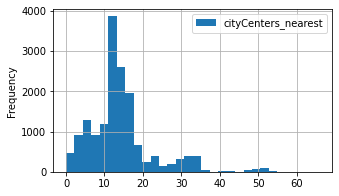

In [34]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['cityCenters_nearest'].describe()

В среднем до центра города 13-14 км. Типичный диапазон составляет от 9 до 16 км.

Изучим расстояние до ближайшего аэропорта.

count    16197.000000
mean     28791.439711
std      12667.648774
min          0.000000
25%      18500.000000
50%      26756.000000
75%      37242.000000
max      84869.000000
Name: airports_nearest, dtype: float64

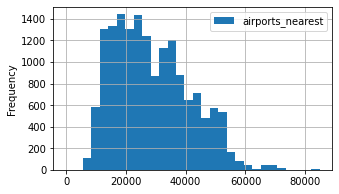

In [35]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['airports_nearest'].describe()

В среднем до ближайщего аэропорта 28 км. Основной диапазон составляет от 18,5 до 37,2 км.

Изучим расстояние до ближайшего парка.

count    7181.000000
mean      488.502715
std       337.407538
min         1.000000
25%       288.000000
50%       455.000000
75%       611.000000
max      3190.000000
Name: parks_nearest, dtype: float64

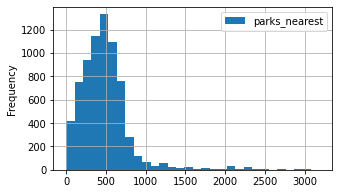

In [36]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['parks_nearest'].describe()

Из гистограммы можно сказать, что практически со всемя квартирами в районе километра есть парк, значения выше довольно редки

#### Изучаем, как быстро продавались квартиры 

count    20865.000000
mean       172.671220
std        207.907625
min          1.000000
25%         48.000000
50%         95.000000
75%        205.000000
max       1580.000000
Name: days_exposition, dtype: float64

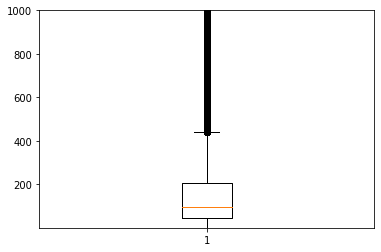

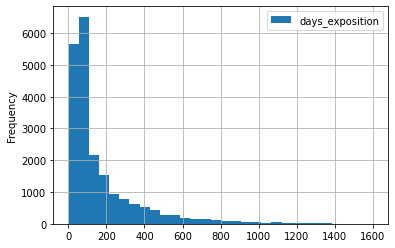

In [37]:
#диаграмма размаха
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()

In [38]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

95.0      2930
45.0       519
60.0       340
7.0        200
30.0       196
          ... 
1201.0       1
671.0        1
1071.0       1
818.0        1
1174.0       1
Name: days_exposition, Length: 1115, dtype: int64

**Вывод:**
Cудя по гистограмме, cреднее значение - 172 дня, а медиана - 95 дней.
Большим значение у данных с временем экмпозиции 0. В общих данных учитывается время снятия объявления, а не факт продажи квартиры. Так как продажа в срок меньше одного дня очень маловероятное событие, можно предполагать, что все значения с нулевым временем это удаленные объявления, которые мы не учитываем.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучим зависимость цены  от общей площади квартиры.

0.26579488584409605

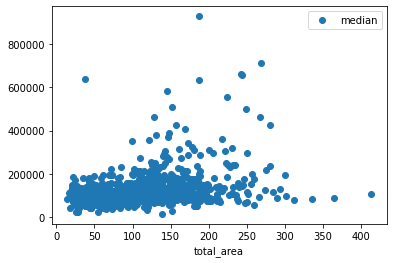

In [39]:
# влияние на стоимость квадратного метра
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
data['total_area'].corr(data['price_per_meter'])

**Вывод:**
Зависимость очень слабая, корреляция составляет всего 0.26

0.6701161742106649

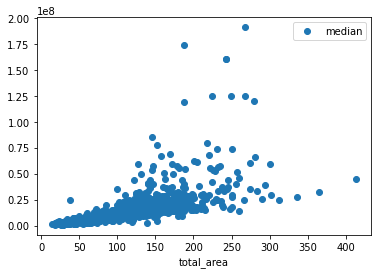

In [40]:
# влияние на стоимость всей квартиры
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
data['total_area'].corr(data['last_price'])

**Вывод:**
Корреляция 0.67 - имеется зависимость, ы целом чеко заметно, что при увеличении площади, увеличивается и цена.

Изучим зависимость цены от жилой площади квартиры.

0.1745164643225923

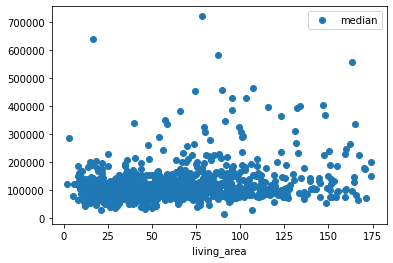

In [41]:
# влияние на стоимость квадратного метра
pivot_table_total_area = data.pivot_table(index = 'living_area', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
data['living_area'].corr(data['price_per_meter'])

**Вывод:**
Опять же зависимость слабая, практически отсутствует, корреляция составляет всего 0.17

0.5804741442546464

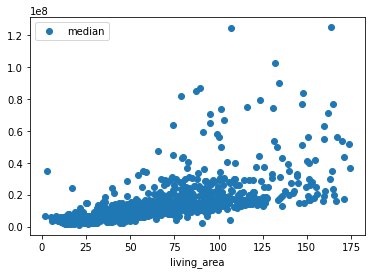

In [42]:
# влияние на стоимость всей квартиры
pivot_table_total_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
data['living_area'].corr(data['last_price'])

**Вывод:**
Корреляция составляет 0.58 - есть определенная зависимость цены и жилпощади.

Изучим зависимость цены от площади кухни.

0.3551844122215536

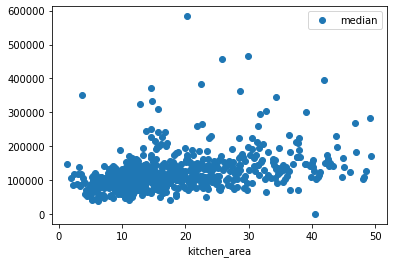

In [43]:
# влияние на стоимость квадратного метра
pivot_table_total_area = data.pivot_table(index = 'kitchen_area', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
data['kitchen_area'].corr(data['price_per_meter'])

**Вывод:**
Можно заметить слабую, но уже более видимую зависимость, корреляция составляет 0.35

0.4866164268812917

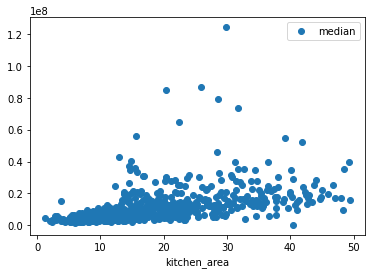

In [44]:
# влияние на стоимость всей квартиры
pivot_table_total_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
data['kitchen_area'].corr(data['last_price'])

**Вывод:**
Зависимость также слабая, корреляция составляет 0.46

Изучим зависимость цены от количества комнат.

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
1,7074.0,100505.861983,32578.961067,11463.414634,83763.204829,100000.000000,116142.739651,7.215190e+05
2,7116.0,95585.802150,43122.971596,111.834862,74130.079019,92987.440191,111640.632754,1.542605e+06
3,5249.0,96475.685842,52600.223976,10507.246377,72705.882353,89032.258065,108333.333333,1.736842e+06
4,1050.0,108264.178552,69221.479984,13483.146067,76536.963333,92466.294484,118521.434933,9.959839e+05
5,259.0,112310.563865,71230.860903,14347.826087,77503.633241,94103.194103,121677.314933,6.584362e+05
6,82.0,127665.047499,87505.609798,28919.631094,83381.902133,98164.403202,146622.433349,5.627706e+05
7,35.0,119973.286224,53430.823075,64516.129032,85283.389280,108260.869565,132183.470403,3.489362e+05


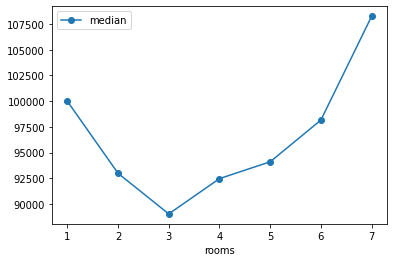

In [45]:
# влияние на стоимость квадратного метра
pivot_table_total_area = data.pivot_table(index = 'rooms', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o-')
data.groupby('rooms')['price_per_meter'].describe()

**Вывод:**
Зависимости нет, хотя можно увидеть возрастание цены при увеличении комнат от 3х. На 3х комнатные квартиры самая низкая цена.

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
1,7074.0,3.830161e+06,1.725301e+06,430000.0,2960000.0,3600000.0,4450000.0,43511000.0
2,7116.0,5.559292e+06,4.889726e+06,12190.0,3700000.0,4790000.0,6500000.0,289238400.0
3,5249.0,7.963599e+06,8.126067e+06,700000.0,4800000.0,6190000.0,8900000.0,330000000.0
4,1050.0,1.264744e+07,1.357499e+07,999000.0,6200000.0,8995000.0,14000000.0,159984000.0
5,259.0,1.811302e+07,1.677487e+07,1650000.0,9900000.0,13180000.0,20700000.0,160000000.0
6,82.0,2.435794e+07,2.112570e+07,4390000.0,12655000.0,16950000.0,25800000.0,130000000.0
7,35.0,2.327257e+07,1.332703e+07,12000000.0,15675000.0,18000000.0,25000000.0,82000000.0


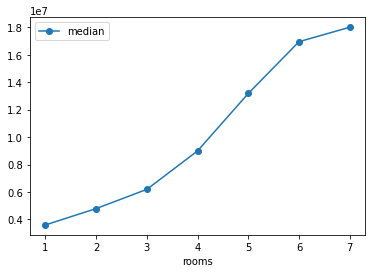

In [46]:
# влияние на стоимость всей квартиры
pivot_table_total_area = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o-')
data.groupby('rooms')['last_price'].describe()

**Вывод:**
Зависимость есть (этого можно было ожидать из-за зависимости цены от площади квартиры, так как чем больше комнат, тем больше площадь)

Изучим зависимость цены от этажа.

,price_per_meter
floor_cat,
другой,102594.232141
первый,81761.552199
последний,91634.636857


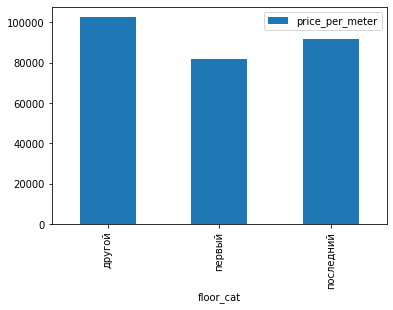

In [47]:
# влияние на стоимость квадратного метра
pivot_table_floor_category = data.pivot_table(index = 'floor_cat', values = 'price_per_meter')
pivot_table_floor_category.plot(kind='bar')
pivot_table_floor_category

**Вывод:**
Самыми непопулярным является первый и последний этажи.

,last_price
floor_cat,
другой,6.437637e+06
первый,4.684983e+06
последний,6.231648e+06


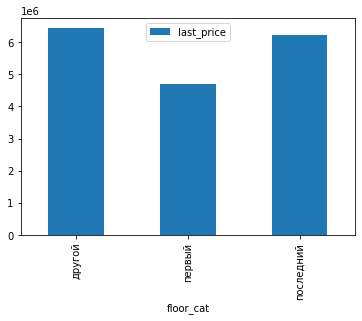

In [48]:
# влияние на стоимость всей квартиры
pivot_table_floor_category = data.pivot_table(index = 'floor_cat', values = 'last_price')
pivot_table_floor_category.plot(kind='bar')
pivot_table_floor_category

**Вывод:**
В целом можно сказать, что есть корреляция. Цена на "другие" и выерхние этажи определенно выше, чем на первый.

Изучим зависимость цены от даты размещения.

-0.009814028975210954

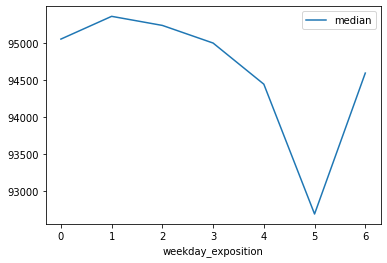

In [49]:
# влияние на стоимость квадратного метра
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
data['weekday_exposition'].corr(data['price_per_meter'])

-4.573757602545278e-05

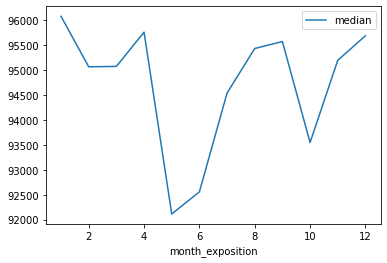

In [50]:
pivot_table_weekday_exposition = data.pivot_table(index = 'month_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
data['month_exposition'].corr(data['price_per_meter'])

0.0213534755422894

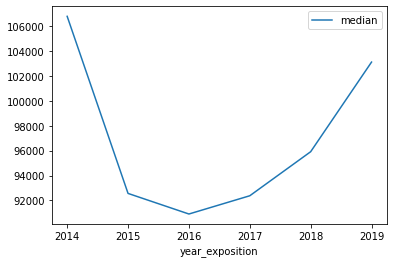

In [51]:
pivot_table_weekday_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
data['year_exposition'].corr(data['price_per_meter'])

**Вывод:**
В будние дни активность гораздо выше, чем в выходные. Активность по месяцам очень скачущая, поэтому нельзя четко сказать, что есть какая-либо зависимость. Пики приходятся на зиму, апрель и сентябрь, тогда как в летние месяцы происходит резкое падение цен.

Из годовой активности видно, что с 2016 года цены возрастают, после резкого падения в 2015-16 годах.

-0.007774413142155182

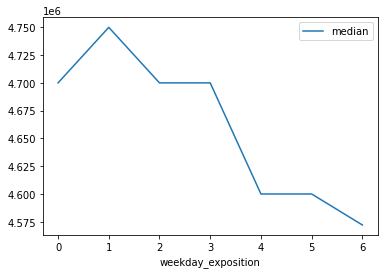

In [52]:
# влияние на стоимость всей квартиры
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
data['weekday_exposition'].corr(data['last_price'])

0.0036827686136683044

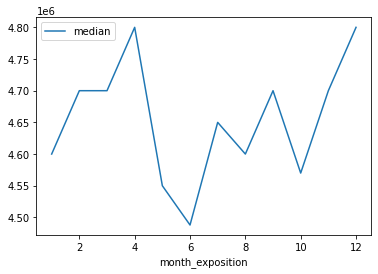

In [53]:
pivot_table_weekday_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
data['month_exposition'].corr(data['last_price'])

-0.04376560387916586

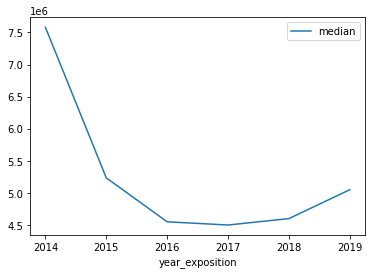

In [54]:
pivot_table_weekday_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
data['year_exposition'].corr(data['last_price'])

**Вывод:**
Заметно завсимость цен от дня недели. Четко видно, что со вторника по воскресенье происходит постепенное снижение цен. И вновь рост с воскресенья по вторник.

В месячной активности видно, что с июня по апрель происходит постепеноое повышение цен (имеются некоторые скачки) и резкое падение в апреле-июне. Так что можно сказать, что определенная зависимость есть.

Из годовой активности видно, что с 2017 года цены возрастают, после резкого падения в 2014-16 годах.

**Вывод этапа:**
- Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью.

- Стоимость квартиры также зависит от числа комнат: чем их больше, тем квартира дороже.

- Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.

- День недели сильно сказывается на цене, чуть менее четко влияет месяц публикации. 

#### Посчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метра.

In [55]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,count,mean
locality_name,,
санкт-петербург,13962,112953.674486
поселок мурино,429,85364.530324
поселок шушары,393,78535.194019
всеволожск,357,69029.150099
пушкин,332,103078.747625
колпино,321,75129.845412
гатчина,290,68635.620745
поселок парголово,288,90756.003417
деревня кудрово,226,92248.477506


Самая высокая стоимость.

In [56]:
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,13962,112953.674486


Самая низкая стоимость.

In [57]:
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
выборг,190,58319.351675


**Вывод:**
Самая высокая стоимость жилья в Санкт-Петербурге, тогда как самая низкая в Выборге

#### Определение зависимости стоимости объектов от расстояния до центра города.

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30 entries, 0.0 to 29.0
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_per_meter  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


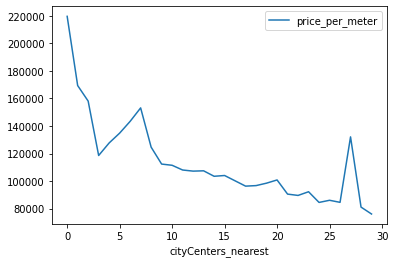

In [58]:
pivot_table_km = data.query('locality_name == "санкт-петербург"').pivot_table(index = 'cityCenters_nearest', values = 'price_per_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km.info()

**Вывод:**
В целом по графику видно, что чем дальше от центра Санкт-Петербурга, тем ниже цена, хотя видны резкие всплески цены на 7 и 27 км.

**Вывод этапа:**
- Исследованы распределения параметров квартир. 
Самымими распространенными являются квартиры с общей площадью 40-69 кв.м., жилплощадью 15-50 кв.м., кухней 5-12 кв.м., ценой 3,5-6,7 млн. рублей, 1-3х комнатными, с высотой потолков 2,6-2,7 м, в домах с типичной застройкой 5-15 этажей, в основном располложеные от центра на расстоянии 9-16 км.

- Проанализирован срок продажи квартир: средний срок продажи - 172 дня.

- Проанализированы факторы вляющие на стоимость квартиры. 
Были получены следующие корреляции: 0,67 у общей площади, 0,58 - жилплощадь, 0,48 - кухни. Также выведены зависимость от количества комнат.

- Так же была посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самой большой ценой естественно обладает Санкт-Петербур - 112953 рублей за кв.м., самой маленькой - Выборг - 58319 рублей.

- Исследована зависимость цены в зависимости от удаления от центра Санк-Петербурга. Выявлена прямая зависмость падения цены при удалении от центра (с наличием всплесков на 7 и 27 километрах)

### Общий вывод

Итак, полученный архив данных - данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
    
Были обработаны пропущенные значения в столбцах `ceiling_height` (обработаны с помощью медианы), `is_apartment` (пропуски заменены на False), `balcony` (пропуски заменены на нулевые значения), `days_exposition` (обработаны с помощью медианы). Обработаны дубликаты названий городов и поселков. Для более подробного анализа посчитаны и добавлены в таблицу цена одного квадратного метра (`price_per_meter`), день недели(`weekday_exposition`), месяц(`month_exposition`) и год публикации объявления(`year_exposition`), тип этажа квартиры, расстояние до центра города в километрах. 
    
Изучены параметры  площади, цены, числа комнат, высоты потолков на наличие выбивающихся значений, а также определены аномалии. В высоте потолков (`ceiling_height`), было обнаружено, что при переносе данных возникла ошибка, в следствии которой появлялись аномально высокие значения.
    
По изученным данным можно сказать, что типичная квартира на продажу имеет общую площадью 40-69 кв.м., жилплощадь 15-50 кв.м., кухню 5-12 кв.м., цену 3,5-6,7 млн. рублей, 1-3 комнаты, высоту потолков 2,6-2,7 м, домах с типичной застройкой 5-15 этажей и располложена от центра на расстоянии 9-16 км.
    
Изученние корреляции зависимости цены от различны параметров дало следующие результаты: корреляция *0,67* у общей площади, *0,58* - жилплощадь, *0,48* - кухни, и зависимость от количества комнат и этажа, на котором расположена квартира. Из чего можно сказать, что прямыми и самими влятельными факторами на цену квартиры являются площадь квартиры и колличество комнат в ней. Остальные параметры хоть и оказывают влияние на цену, но не так значительно.
    
Было выявлено, что в среднем продажа происходит за 100-180 дней. Но также возникают аномалии на 30, 45, 60, 90 днях. Также обнаружену большое колличесво объявлений с 0 дней продаж, что вероянее являются просто снятыми с продаж объявлениями.
    
Самым дорогим городом оказался Санкт-Петербур с 112953 рублей за кв.м в среднем с постепенным уменьшением цен от центра к окраинам, что в целом не удивительно.
    
Также заметно повышение цен с 2016 года. В целом важно учитывать, что рассматривались лишь смотрели средние показатели по рынку в целом, поэтому нельзя исключать возможность различного поведения цен в конкретных года.